<img src ='https://www.dol.gov/profiles/dol_profile/themes/opa_theme/img/dol-logo.png' height=150 width=150>
# US Working Visa Analysis
______

Conducting a research of how US companies hire and apply for working visa for foreign workers. The dataset of Labor Condition Application used in this case study was downloaded from <a href="https://www.doleta.gov/">United States Department of Labor</a> website.

**Three real datasets:**
 - <a href='https://www.foreignlaborcert.doleta.gov/performancedata.cfm'> The result of 2016 applications for H1B visas</a>
 - <a href='https://catalog.data.gov/dataset/north-american-industry-classification-system-naics'> NAICS codes </a>
 - <a href ' https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population'> US States</a>

**Perform Analysis:**
1. What are the top 10 occupations for H1B visas with certified status?
2. Which company hires more data scientists? 
3. What is the average salary for data scientists? How it is compared to the mean of applications?
4. Which state has the higher deny proportionally to application. And proportionally to the population?
5. What industries are in the top 5 percentile of applications?
6. Does the month of the application play any role in to denied process? What about decision dates?


In [1]:
# Import packages needed to perform the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the H1B visas dataset
visas = pd.read_csv('H-1B disclosure data.csv', encoding = 'latin1')

In [3]:
# Explore the dataset
visas.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149
1,I-200-10138-949973,CERTIFIED-WITHDRAWN,11-03-16,28-11-16,H-1B,07-09-16,06-09-19,"WEST-CAMP PRESS, INC.",OH,43081,STAFF ACCOUNTANT,13-2011,ACCOUNTANTS AND AUDITORS,323119,45698
2,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341
3,I-200-11080-460161,CERTIFIED-WITHDRAWN,03-02-15,31-10-16,H-1B,09-02-15,08-02-18,CONOCOPHILLIPS COMPANY,TX,77079,PETROPHYSICIST,19-4041,GEOLOGICAL AND PETROLEUM TECHNICIANS,324110,65520
4,I-200-12047-839355,CERTIFIED-WITHDRAWN,27-02-15,07-10-16,H-1B,29-08-15,28-08-18,"SUNERA TECHNOLOGIES, INC",MI,48083,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,5415,68578


The dataset contains 93,533 rows and 15 columns.

In [4]:
visas.shape

(93533, 15)

### The top 10 occupations for H1B visas with certified status?

In [5]:
# Investigate the levels of the categorical variable STATUS
visas.CASE_STATUS.unique()

array(['CERTIFIED', 'CERTIFIED-WITHDRAWN', 'WITHDRAWN', 'DENIED'],
      dtype=object)

In [6]:
# Investigate the number of cases in the visas dataset
visas.CASE_NUMBER.count()

93533

In [7]:
# Subset just the certifieds STSTUS ('CERTIFIED' and 'CERTIFIED-WITHDRAWN')
certified_visas = visas[(visas.CASE_STATUS == 'CERTIFIED') | (visas.CASE_STATUS == 'CERTIFIED-WITHDRAWN')]

In [8]:
# Investigate the number of cases in the certified_visas dataset
certified_visas.CASE_NUMBER.count()

88974

In [9]:
# Investigate the number of different occupation
len(certified_visas.SOC_NAME.unique())

491

In [10]:
# Subset, Group, sum and sort in one single line
cert_visas_grp_occ = certified_visas[['SOC_CODE','SOC_NAME']].groupby('SOC_NAME').agg('count').sort_values(by='SOC_CODE', ascending=False)

# Alternatively, Group, sum and sort in three steps
cert_visas_grp_occ_1 = certified_visas[['SOC_CODE','SOC_NAME']]
cert_visas_grp_occ_2 = cert_visas_grp_occ_1.groupby('SOC_NAME').agg('count')
cert_visas_grp_occ_3 = cert_visas_grp_occ_2.sort_values(by='SOC_CODE', ascending=False)

In [11]:
# Compare both dataframes
cert_visas_grp_occ.head()
cert_visas_grp_occ_3.head()

,SOC_CODE
SOC_NAME,
"SOFTWARE DEVELOPERS, APPLICATIONS",18369
COMPUTER SYSTEMS ANALYSTS,13866
COMPUTER PROGRAMMERS,11005
"COMPUTER OCCUPATIONS, ALL OTHER",7133
COMPUTER SYSTEMS ANALYST,3387


In [12]:
# Reset the index, rename the column names and show the top 10
cert_visas_grp_occ = cert_visas_grp_occ.reset_index()
cert_visas_grp_occ.columns = ['Occupation','Quantity']
cert_visas_grp_occ[0:10]

,Occupation,Quantity
0,"SOFTWARE DEVELOPERS, APPLICATIONS",18369
1,COMPUTER SYSTEMS ANALYSTS,13866
2,COMPUTER PROGRAMMERS,11005
3,"COMPUTER OCCUPATIONS, ALL OTHER",7133
4,COMPUTER SYSTEMS ANALYST,3387
5,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",2814
6,MANAGEMENT ANALYSTS,1784
7,ACCOUNTANTS AND AUDITORS,1657
8,NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS,1299
9,FINANCIAL ANALYSTS,1148


###  Which company hires more data scientists?

In [13]:
# Subset, Group, sum and sort in one single line
visas_gr_comp = visas[['EMPLOYER_NAME','JOB_TITLE']][visas.JOB_TITLE == 'DATA SCIENTIST'].groupby('EMPLOYER_NAME').agg('count').sort_values(by='JOB_TITLE', ascending=False)

# Alternatively, Group, sum and sort in four steps
visas_gr_comp_1 = visas[['EMPLOYER_NAME','JOB_TITLE']]
visas_gr_comp_2 = visas_gr_comp_1[visas.JOB_TITLE == 'DATA SCIENTIST']
visas_gr_comp_3 = visas_gr_comp_2.groupby('EMPLOYER_NAME').agg('count')
visas_gr_comp_4 = visas_gr_comp_3.sort_values(by='JOB_TITLE', ascending=False)

In [14]:
# Compare both dataframes
visas_gr_comp.head()
visas_gr_comp_4.head()

,JOB_TITLE
EMPLOYER_NAME,
MICROSOFT CORPORATION,40
"FACEBOOK, INC.",12
"UBER TECHNOLOGIES, INC.",6
"THE NIELSEN COMPANY (US), LLC",4
SCHLUMBERGER TECHNOLOGY CORPORATION,4


In [15]:
# Reset the index, rename the column names and show the single company that hires more foreign data scientists
visas_gr_comp = visas_gr_comp.reset_index()
visas_gr_comp.columns = ['Company','Quantity']
visas_gr_comp[0:1]

,Company,Quantity
0,MICROSOFT CORPORATION,40


### The average salary for data scientists? How it is compared to the mean of applications.?

In [16]:
# Calculate the mean of all applications
all_positions_salary = np.mean(visas.PREVAILING_WAGE)

print ('The average salary of all applications is $ {:.2f}'.format(all_positions_salary))

The average salary of all applications is $ 75734.59


In [17]:
# Calculate the mean of data science positions
ds_salary = np.mean(visas[visas.JOB_TITLE == 'DATA SCIENTIST'].PREVAILING_WAGE)

print ('The average salary of data scientists is $ {:.2f}'.format(ds_salary))

The average salary of data scientists is $ 88646.04


In [18]:
salary_diff = ds_salary - all_positions_salary

print ('Data scientists earn, on average, $ {:.2f} more. It represents {:.2f}% more than the average of all applications.'
       .format(salary_diff, salary_diff/all_positions_salary*100))

Data scientists earn, on average, $ 12911.46 more. It represents 17.05% more than the average of all applications.


### Which state has the higher deny proportionally to application. And proportionally to the population?

In [19]:
# Investigate the number of denied cases
visas[visas.CASE_STATUS == 'DENIED'].CASE_NUMBER.count()

1369

In [20]:
# Read the states population dataset
states = pd.read_csv ('states population.csv', encoding = 'latin1')

In [21]:
# Explore the states population dataset
states.head()

,State abbreviation,State,Population estimate
0,CA,California,39250017
1,TX,Texas,27862596
2,FL,Florida,20612439
3,NY,New York,19745289
4,PA,Pennsylvania,12802503


In [22]:
# Create a new dataframe to store all the numbers needed to perform the calculation
visas_by_state = pd.DataFrame(states['State abbreviation'].unique())

# Rename the column
visas_by_state.columns = ['state']

# Create three more coluns filled with zeros
visas_by_state['denied'] = np.zeros(len(visas_by_state))
visas_by_state['applicants'] = np.zeros(len(visas_by_state))
visas_by_state['population'] = np.zeros(len(visas_by_state))

# Redefine the index
visas_by_state.set_index(visas_by_state.state, inplace=True, drop=True)

In [23]:
# Explore the new dataset created
visas_by_state.head()

,state,denied,applicants,population
state,,,,
CA,CA,0.0,0.0,0.0
TX,TX,0.0,0.0,0.0
FL,FL,0.0,0.0,0.0
NY,NY,0.0,0.0,0.0
PA,PA,0.0,0.0,0.0


In [24]:
# Loop through the states dataframe
for st in visas_by_state.state:

    # count denied visas by state
    visas_by_state.ix[st, 'denied'] = len(visas[(visas.CASE_STATUS == 'DENIED') & (visas.EMPLOYER_STATE == st)])

    # count applications by state
    visas_by_state.ix[st, 'applicants'] = len(visas[visas.EMPLOYER_STATE == st])

    # fill the population by state
    visas_by_state.ix[st, 'population'] = np.sum(states[states['State abbreviation'] == st]['Population estimate'])

In [25]:
# Investigate the filled dataframe
visas_by_state.head()

,state,denied,applicants,population
state,,,,
CA,CA,257.0,15293.0,39250017.0
TX,TX,106.0,12090.0,27862596.0
FL,FL,74.0,3025.0,20612439.0
NY,NY,164.0,6606.0,19745289.0
PA,PA,77.0,3704.0,12802503.0


In [26]:
# Create two additional columns to represent the proportion of denied by applications and by population
visas_by_state['denied_by_application'] = np.divide (visas_by_state.denied, visas_by_state.applicants)
visas_by_state['denied_by_population'] = np.divide (visas_by_state.denied, visas_by_state.population)

In [27]:
# Merge the visas by state and the states population to get the state name
visas_by_state = pd.merge(visas_by_state, states, left_on = 'state', right_on = 'State abbreviation')

# Explore the dataframe after the merge
visas_by_state.head()

,state,denied,applicants,population,denied_by_application,denied_by_population,State abbreviation,State,Population estimate
0,CA,257.0,15293.0,39250017.0,0.016805,0.000007,CA,California,39250017
1,TX,106.0,12090.0,27862596.0,0.008768,0.000004,TX,Texas,27862596
2,FL,74.0,3025.0,20612439.0,0.024463,0.000004,FL,Florida,20612439
3,NY,164.0,6606.0,19745289.0,0.024826,0.000008,NY,New York,19745289
4,PA,77.0,3704.0,12802503.0,0.020788,0.000006,PA,Pennsylvania,12802503


In [28]:
# Show the state with higher rate of denied visas by application (13,04%)
visas_by_state.sort_values(by='denied_by_application', ascending=False)[0:1][['State abbreviation','State', 'denied_by_application']]

,State abbreviation,State,denied_by_application
39,HI,Hawaii,0.130435


In [29]:
# Show the state with higher rate of denied visas by population (0,0013%)
visas_by_state.sort_values(by='denied_by_population', ascending=False)[0:1][['State abbreviation','State','denied_by_population']]

,State abbreviation,State,denied_by_population
44,DE,Delaware,0.000013


### What industries are in the top 5 percentile of applications?

In [30]:
# Read the NAICS dataset
naics = pd.read_csv ('naics codes.csv', encoding = 'latin1')

In [31]:
# Explore the dataset
naics.head()

,NAICS Code,NAICS Title,Unnamed: 2
0,11,"Agriculture, Forestry, Fishing and Hunting",NaN
1,21,"Mining, Quarrying, and Oil and Gas Extraction",NaN
2,22,Utilities,NaN
3,23,Construction,NaN
4,42,Wholesale Trade,NaN


In [32]:
# Remove the last column, with invalid values
naics = naics[['NAICS Code', 'NAICS Title']]

# Rename the columns
naics.columns = ['NAICS_CODE','NAICS_TITLE']

In [33]:
# Investigate if we have more than 1 code in the dataset
naics[['NAICS_CODE','NAICS_TITLE']].groupby('NAICS_CODE').agg('count').reset_index().sort_values(by='NAICS_TITLE', ascending=False).head()

,NAICS_CODE,NAICS_TITLE
1219,113310,4
1926,441320,4
1911,424920,4
1912,424930,4
1914,424950,4


In [34]:
# Drop the duplicate codes, but leave 1 of each
naics.drop_duplicates(subset=['NAICS_CODE'], keep='last', inplace = True)

In [35]:
# Investigate if we have more than 1 code in the dataset
naics[['NAICS_CODE','NAICS_TITLE']].groupby('NAICS_CODE').agg('count').reset_index().sort_values(by='NAICS_TITLE', ascending=False).head()

,NAICS_CODE,NAICS_TITLE
0,11,1
1629,332322,1
1622,332214,1
1623,332215,1
1624,332216,1


In [36]:
# Merge visas and naics dataset
visas_by_industry = pd.merge(visas, naics, on = 'NAICS_CODE')

In [37]:
# Explore merged dataset
visas_by_industry.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE,NAICS_TITLE
0,I-200-09209-039181,CERTIFIED,27-09-16,03-10-16,H-1B,01-10-16,20-09-19,CLOUDWICK TECHNOLOGIES INC.,CA,94560,HADOOP ADMINISTRATOR,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511,102149,Custom Computer Programming Services
1,I-200-11045-306092,WITHDRAWN,05-12-16,05-12-16,H-1B,12-12-16,30-06-19,"FUTURETECH CONSULTANTS, L.L.C",GA,30092,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,60341,Custom Computer Programming Services
2,I-200-13070-034520,WITHDRAWN,11-03-13,14-10-16,H-1B,02-09-13,01-09-16,"ARKSTEK, INC.",CO,80014,PROGRAMMER ANALYST,15-1131,COMPUTER PROGRAMMERS,541511,46072,Custom Computer Programming Services
3,I-200-13197-156587,CERTIFIED-WITHDRAWN,17-07-13,04-10-16,H-1B,07-11-13,06-11-16,PRAMATI TECHNOLOGIES PRIVATE LIMITED,CA,94040,SOFTWARE ENGINEER,15-1799,"COMPUTER OCCUPATIONS, ALL OTHER*",541511,69056,Custom Computer Programming Services
4,I-200-13261-383214,WITHDRAWN,27-09-13,18-11-16,H-1B,27-03-14,26-03-17,"NETAPP, INC.",CA,94089,"MEMBER TECHNICAL STAFF, QUALITY ASSURANCE",15-1133,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",541511,110094,Custom Computer Programming Services


In [38]:
# Group the visas by industry
visas_gr_by_industry = visas_by_industry[['NAICS_TITLE','NAICS_CODE']].groupby('NAICS_TITLE').agg('count').reset_index().sort_values(by='NAICS_CODE', ascending=False)

# Rename the colunms
visas_gr_by_industry.columns = ['Industry','Quantity']

# Explore the dataset
visas_gr_by_industry.head()

,Industry,Quantity
227,Custom Computer Programming Services,31941
194,Computer Systems Design and Related Services,6742
193,Computer Systems Design Services,5311
174,"Colleges, Universities, and Professional Schools",5298
489,"Management, Scientific, and Technical Consulti...",3689


In [39]:
# Calculate the 95th percentile
top_95_percentile = np.percentile(a = visas_gr_by_industry.Quantity, q = 95)

top_95_percentile

157.0

In [40]:
# Filter just the top 5 percentile
visas_gr_by_industry[visas_gr_by_industry.Quantity >=  top_95_percentile]

,Industry,Quantity
227,Custom Computer Programming Services,31941
194,Computer Systems Design and Related Services,6742
193,Computer Systems Design Services,5311
174,"Colleges, Universities, and Professional Schools",5298
489,"Management, Scientific, and Technical Consulti...",3689
876,Software Publishers,2640
636,Other Computer Related Services,1855
585,Offices of Certified Public Accountants,1476
296,Engineering Services,1406
12,Administrative Management and General Manageme...,1270


### Does the month of application play any role in to denied process? What about decision dates?

In [41]:
# Filter just the dates of denied visas
denied_visas = visas[['CASE_NUMBER','CASE_SUBMITTED', 'DECISION_DATE']][visas.CASE_STATUS == 'DENIED']

# Extract the month from both dates
denied_visas['Month_submitted'] =  pd.DatetimeIndex( denied_visas.CASE_SUBMITTED).month
denied_visas['Month_decision'] =  pd.DatetimeIndex( denied_visas.DECISION_DATE).month

In [42]:
# Explore the dataset
denied_visas.head()

,CASE_NUMBER,CASE_SUBMITTED,DECISION_DATE,Month_submitted,Month_decision
1881,I-200-14311-284928,20-12-16,22-12-16,12,12
2533,I-200-15060-565396,29-09-16,03-10-16,9,3
3556,I-200-15139-183403,05-10-16,07-10-16,5,7
4179,I-200-15251-717050,12-12-16,14-12-16,12,12
6754,I-200-16075-799719,15-11-16,17-11-16,11,11


In [43]:
# Group by month of submitted dates
denied_visas_gr_by_month_sub = denied_visas[['Month_submitted','CASE_NUMBER']].groupby('Month_submitted').agg('count').reset_index().sort_values(by='Month_submitted', ascending=True)

# Group by month of decision dates
denied_visas_gr_by_month_dec = denied_visas[['Month_decision','CASE_NUMBER']].groupby('Month_decision').agg('count').reset_index().sort_values(by='Month_decision', ascending=True)

# Change the column names
denied_visas_gr_by_month_sub.columns = ['Month','Quantity']
denied_visas_gr_by_month_dec.columns = ['Month','Quantity']

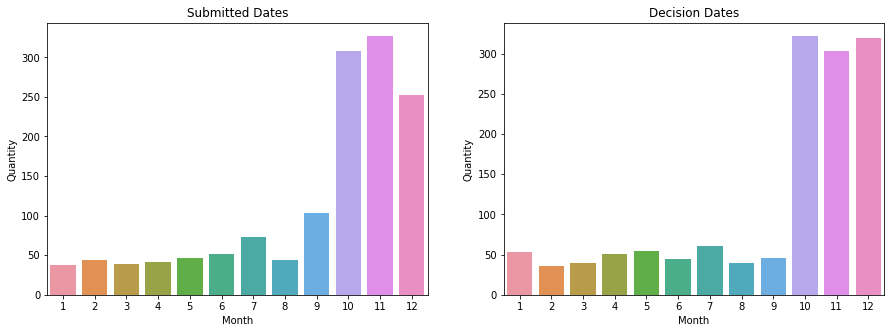

In [47]:
fig, ax = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))
sns.barplot(x='Month', y='Quantity', data=denied_visas_gr_by_month_sub, ax = ax[0],) #Submitted dates
sns.barplot(x='Month', y='Quantity', data=denied_visas_gr_by_month_dec,ax=ax[1]) #Decision dates
ax[0].set_title("Submitted Dates")
ax[1].set_title("Decision Dates")
fig.show()